In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!matplotlib.inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

'matplotlib.inline' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Importing Data

df = pd.read_excel('Expenses.xlsx')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# To check if there is any missing values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.iloc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges       16884.9
Name: 0, dtype: object

# EDA

<AxesSubplot:>

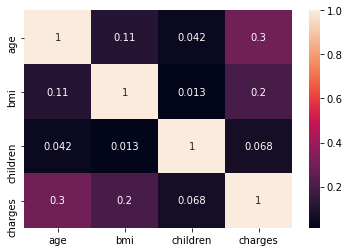

In [37]:
sns.heatmap(df.corr(), annot = True, fmt = '.2g')

>By looking at the heat map this is evident that the features are weakly correlated.

<AxesSubplot:xlabel='age', ylabel='Count'>

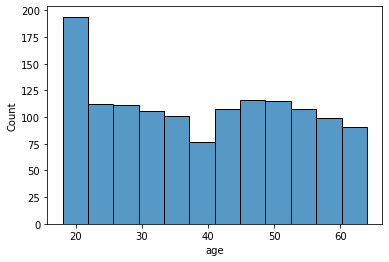

In [38]:
sns.histplot(df['age'])

>We have nearly double people from the 19-22 age group compared to other group in this data set.

<AxesSubplot:xlabel='age', ylabel='charges'>

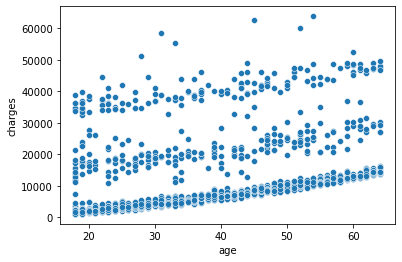

In [39]:
sns.scatterplot(y = df['charges'], x=  df['age'])

>As the age of the person increases the charges are also increases.

<AxesSubplot:xlabel='region', ylabel='bmi'>

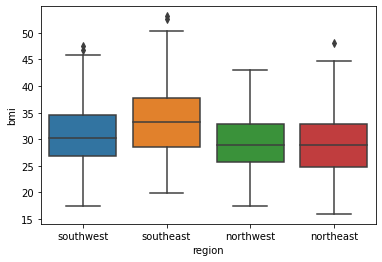

In [23]:
sns.boxplot(x = df['region'], y = df['bmi'])

>From the above boxplot this can be concluded that Southeast region have above avg bmi

<AxesSubplot:xlabel='smoker', ylabel='charges'>

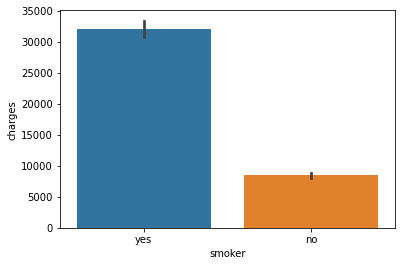

In [41]:
sns.barplot(df['smoker'], df['charges'])

>If the person is a smoker it greatly increases the charges respective to non-smoker

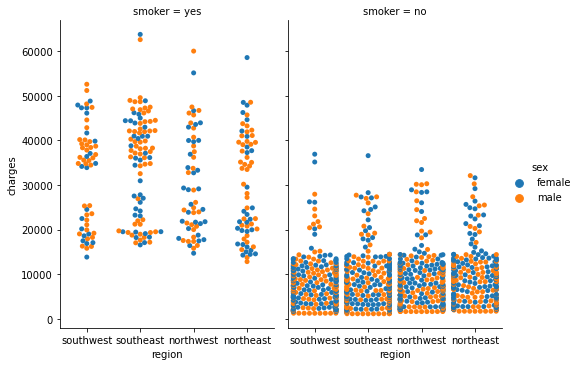

In [54]:
sns.catplot(x="region", y="charges", hue="sex",
            col="smoker", aspect=.7,kind="swarm", data=df)

###### This above plot shows many things
     1) No of non-smokers are greater than smokers
     2) based on the region the male to female ratio changes.
     3) charges are low for non smokers.
 

#### Preprocessing Data

In [23]:
# Splitting the target variable and the features
Y = df['charges']
X = df.drop(['charges'], axis =1)

In [24]:
# splitting the numerical and catogorical features
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

<AxesSubplot:xlabel='charges', ylabel='Count'>

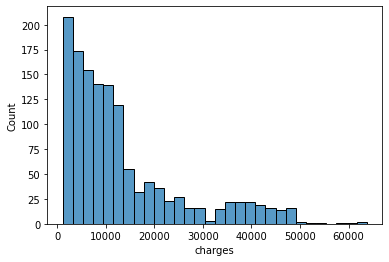

In [25]:
sns.histplot(Y)

>The mean of the charges is 13270. Its a right skew data.

In [26]:
Y.mean()

13270.422346038864

#### Numercal Features

In [27]:
num.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [28]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
1%,18.000000,17.895150,0.000000
5%,18.000000,21.256000,0.000000
10%,19.000000,22.990000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000


> We don't need to remove outlier as this is a uniform distribution

# Feature Selection
    Now our data is clean so we can do feature selection.

#### Numerical Feature selection

In [34]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,bmi_Rank,children_Rank
0,1.0,3.0,0.0
1,0.0,7.0,1.0
2,2.0,6.0,3.0
3,3.0,0.0,0.0
4,3.0,4.0,0.0


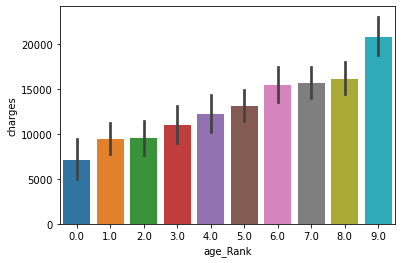

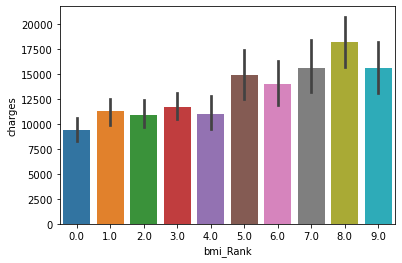

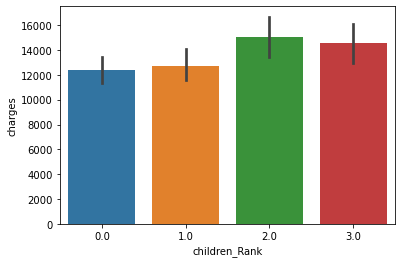

In [36]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="charges",data=X_bin_combined, estimator=mean )
plt.show()

 >  Here we can see that how much discriminate the features are to our target variable as highly discriminate means highly  predictive So we can select all numerical features.

#### Categorical feature selection

In [38]:
char.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


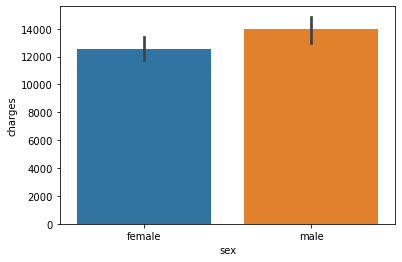

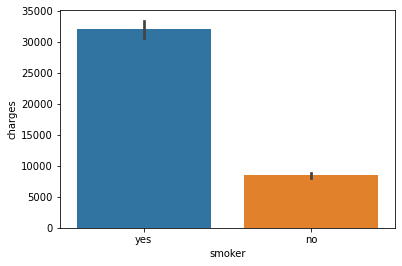

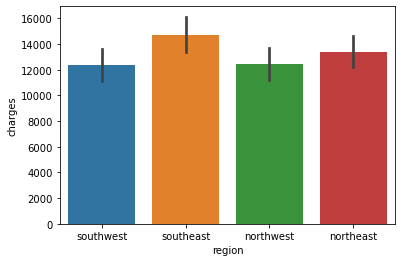

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="charges",data=X_char_merged, estimator=mean )
plt.show()

> Here we can see that how much discriminate the features are to our target variable as highly discriminate means highly  predictive So we can select all Categorical features.

In [46]:
X_dumy = pd.get_dummies(char, drop_first =True)
print(X_dumy.shape)
X_dumy.head(3)

(1338, 5)


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0


In [47]:
# Creating Masyter features

X_all = pd.concat([num, X_dumy],axis = 1 ,join = 'inner')

In [65]:
# Scoring Function
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.25, random_state=39)
print("Shape of Training Data",x_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Mean in Training Data",y_train.mean())
print("Mean in Testing Data",y_test.mean())

Shape of Training Data (1003, 8)
Shape of Testing Data (335, 8)
Mean in Training Data 13286.221270189435
Mean in Testing Data 13223.119895522388


#### Model Selection

In [70]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_lr, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_lr, y_test))
print("r2_score",metrics.r2_score(y_pred_lr, y_test))

mean_squared_error: 37557436.33542161
mean_absolute_error 4143.024361605022
r2_score 0.6634033582703378


In [73]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
y_pred_dtree = dtree.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_dtree, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_dtree, y_test))
print("r2_score",metrics.r2_score(y_pred_dtree, y_test))

mean_squared_error: 43894692.380147025
mean_absolute_error 3157.284414925373
r2_score 0.7241922332367547


In [99]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_rfr, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_rfr, y_test))
print("r2_score",metrics.r2_score(y_pred_rfr, y_test))

mean_squared_error: 25029192.350387715
mean_absolute_error 2754.607032597015
r2_score 0.8155491207630281


In [86]:
# ada boost

from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(),n_estimators=50 )
abc.fit(x_train,y_train)
y_pred_abc = abc.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_abc, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_abc, y_test))
print("r2_score",metrics.r2_score(y_pred_abc, y_test))

mean_squared_error: 27710384.796888392
mean_absolute_error 2178.2936895522384
r2_score 0.7994029407716067


In [134]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_xgb, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_xgb, y_test))
print("r2_score",metrics.r2_score(y_pred_xgb, y_test))

mean_squared_error: 28623732.33450258
mean_absolute_error 2956.2822267563547
r2_score 0.7937138209490154


In [118]:
# Hyperparameter Tunning

param =  {"max_depth": [5,3, None],
              "max_features": range(3,7),
              "min_samples_split": range(2,6)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rfr, param_grid = param, cv=5)

gs.fit(X_all, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 3, None], 'max_features': range(3, 7),
                         'min_samples_split': range(2, 6)})

In [119]:
gs.best_estimator_ 

RandomForestRegressor(max_depth=5, max_features=5, min_samples_split=3)

In [116]:
from sklearn.ensemble import RandomForestRegressor
rfr_gs = RandomForestRegressor(max_depth=5, max_features=6, min_samples_split=3)
rfr_gs.fit(x_train,y_train)
y_pred_rfr_gs = rfr_gs.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_rfr_gs, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_rfr_gs, y_test))
print("r2_score",metrics.r2_score(y_pred_rfr_gs, y_test))

mean_squared_error: 21782302.88866746
mean_absolute_error 2508.7282605358478
r2_score 0.836902553253076


In [117]:
print(f"The R2 score increased after applying Grid Search on RFR by {metrics.r2_score(y_pred_rfr_gs, y_test)-metrics.r2_score(y_pred_rfr, y_test)}")

The R2 score increased after applying Grid Search on RFR by 0.021353432490047952


In [121]:
from sklearn.ensemble import StackingRegressor
base_learner = [
                        ('rf', RandomForestRegressor(max_depth=5, max_features=6, min_samples_split=3)),
                        ('ada', AdaBoostRegressor(base_estimator= DecisionTreeRegressor(),n_estimators=50 ))  
                       ] 
sr = StackingRegressor(estimators = base_learner, final_estimator=LinearRegression(), verbose=0)

sr.fit(x_train, y_train)
y_pred_sr = sr.predict(x_test)

print("mean_squared_error:", metrics.mean_squared_error(y_pred_sr, y_test))  
print("mean_absolute_error",metrics.mean_absolute_error(y_pred_sr, y_test))
print("r2_score",metrics.r2_score(y_pred_sr, y_test))

mean_squared_error: 22132257.31892476
mean_absolute_error 2471.2255078450626
r2_score 0.8363437726248635


  >After Evaluating the models the best model is Random Forest Regressor.

In [ ]:
# Savomg the model

import joblib
joblib.dump(rfr_gs,'RandomForest.joblib')

In [62]:
#loading the model

RandomForest = joblib.load('RandomForest.joblib')
RandomForest

RandomForestRegressor(max_depth=5, max_features=6, min_samples_split=3)

In [133]:
# Predicting the output

input_data  = (19, 28, 0, 0, 1, 0 ,0, 1)
input_np = np.asarray(input_data)

#  Reshaping the array as we are predction for one instance
input_np_reshape = input_np.reshape(1, -1)

print(RandomForest.predict(input_np_reshape))

[18549.24299373]
